# Imports

In [1]:
! pip install NRCLex==3.0.0


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! py -m pip install matplotlib


[notice] A new release of pip is available: 23.0 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
from wordcloud import WordCloud
import regex as re
from nrclex import NRCLex
import nltk.corpus
from nltk.corpus import stopwords, wordnet, words
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Data

In [4]:
df = pd.read_csv('C:/Users/jessi/tswift_lyrics/genius_lyrics_collection/tswift_lyrics.csv')
df.head()

Album                        Song Name  \
0  Taylor Swift           A Perfectly Good Heart   
1  Taylor Swift            A Place In This World   
2  Taylor Swift                      Cold as You   
3  Taylor Swift    I'm Only Me When I'm With You   
4  Taylor Swift                        Invisible   

                                              Lyrics  
0  why would you wanna break a perfectly good hea...  
1  i dont know what i want so dont ask me cause i...  
2  you have a way of coming easily to me and when...  
3  friday night beneath the stars in a field behi...  
4  she cant see the way your eyes light up when y...

## Text Cleaning and Tokenization

In [5]:
# tokenize lyrics
lyric_text = word_tokenize(' '.join(df['Lyrics']))

# lemmatized tokens lyrics
lemmatizer = WordNetLemmatizer()
lem_lyrics = [lemmatizer.lemmatize(word) for word in lyric_text]

print(len(lem_lyrics))
print(lem_lyrics)

85324
['why', 'would', 'you', 'wan', 'na', 'break', 'a', 'perfectly', 'good', 'heart', 'why', 'would', 'you', 'wan', 'na', 'take', 'our', 'love', 'and', 'tear', 'it', 'all', 'apart', 'now', 'why', 'would', 'you', 'wan', 'na', 'make', 'the', 'very', 'first', 'scar', 'why', 'would', 'you', 'wan', 'na', 'break', 'a', 'perfectly', 'good', 'heart', 'maybe', 'i', 'shouldve', 'seen', 'the', 'sign', 'shouldve', 'read', 'the', 'writing', 'on', 'the', 'wall', 'and', 'realized', 'by', 'the', 'distance', 'in', 'your', 'eye', 'that', 'i', 'would', 'be', 'the', 'one', 'to', 'fall', 'no', 'matter', 'what', 'you', 'say', 'i', 'still', 'cant', 'believe', 'that', 'you', 'would', 'walk', 'away', 'it', 'dont', 'make', 'sense', 'to', 'me', 'but', 'why', 'would', 'you', 'wan', 'na', 'break', 'a', 'perfectly', 'good', 'heart', 'why', 'would', 'you', 'wan', 'na', 'take', 'our', 'love', 'and', 'tear', 'it', 'all', 'apart', 'now', 'why', 'would', 'you', 'wan', 'na', 'make', 'the', 'very', 'first', 'scar', 'why'

In [6]:
# convert list of strings to single string
lyric_words = ' '.join(lem_lyrics)

print(len(lyric_words))
print(lyric_words)

398895
why would you wan na break a perfectly good heart why would you wan na take our love and tear it all apart now why would you wan na make the very first scar why would you wan na break a perfectly good heart maybe i shouldve seen the sign shouldve read the writing on the wall and realized by the distance in your eye that i would be the one to fall no matter what you say i still cant believe that you would walk away it dont make sense to me but why would you wan na break a perfectly good heart why would you wan na take our love and tear it all apart now why would you wan na make the very first scar why would you wan na break a perfectly good heart it not unbroken anymore it not unbroken anymore how do i get it back the way it wa before why would you wan na break a perfectly good heart why would you wan na take our love and tear it all apart now why would you wan na make the very first scar why would you wan na break— why would you wan na break it why would you wan na break a perfe

# Sentiment Analysis

In [7]:
# initialize SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# calculate sentiment scores for entire text
sentiment_score = analyzer.polarity_scores(lyric_words)

# extract individual scores
neg = sentiment_score['neg']
neu = sentiment_score['neu']
pos = sentiment_score['pos']

sentiment_score

{'neg': 0.119, 'neu': 0.705, 'pos': 0.176, 'compound': 1.0}

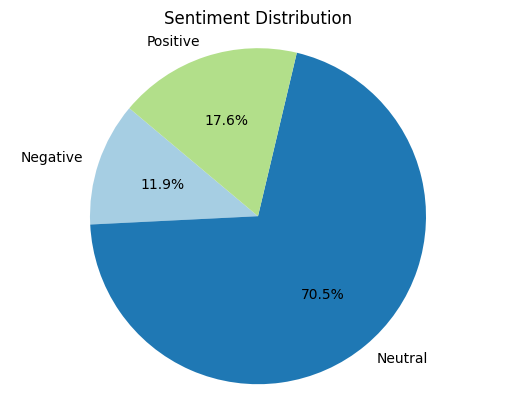

In [8]:
# create labels for pie chart
labels = ['Negative', 'Neutral', 'Positive']

# create sizes for each sentiment category
sizes = [neg, neu, pos]

# plot pie chart
plt.figure()
plt.pie(sizes,
        labels = labels,
        colors = plt.cm.Paired.colors,
        autopct = '%1.1f%%',
        startangle = 140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [9]:
# initialize list of word sentiments
word_sentiments = []

# initialize variables to accumulate sentiment scores
pos_score_sum = 0
neg_score_sum = 0
neu_score_sum = 0
pos_count = 0
neg_count = 0
neu_count = 0
total_words = 0

# count occurrences of each sentiment and accumulate sentiment scores
for word in lem_lyrics:
    total_words += 1
    sentiment_score = analyzer.polarity_scores(word)['compound']
    if sentiment_score >= 0.05:
        word_sentiments.append(('Positive', word))
        pos_count += 1
        pos_score_sum += sentiment_score
    elif sentiment_score <= (-0.05):
        word_sentiments.append(('Negative', word))
        neg_count += 1
        neg_score_sum += sentiment_score
    else:
        word_sentiments.append(('Neutral', word))
        neu_count += 1
        neu_score_sum += sentiment_score
    
# calculate avg sentiment score for each emotion
avg_pos_score = pos_score_sum / pos_count if pos_count != 0 else 0
avg_neg_score = neg_score_sum / neg_count if neg_count != 0 else 0
avg_neu_score = neu_score_sum / neu_count if neu_count != 0 else 0
avg_total_score = (pos_score_sum + neg_score_sum + neu_score_sum) / total_words

# print results
print('pos:', pos_count)
print('neg:', neg_count)
print('neu:', neu_count)
print('Total:', total_words)

# Print results with two decimal places
print('Avg. Pos. Score: {:.2f}'.format(avg_pos_score))
print('Avg. Neg. Score: {:.2f}'.format(avg_neg_score))
print('Avg. Neu. Score: {:.2f}'.format(avg_neu_score))
print('Avg. Total Score: {:.2f}'.format(avg_total_score))

pos: 4926
neg: 3390
neu: 77008
Total: 85324
Avg. Pos. Score: 0.40
Avg. Neg. Score: -0.38
Avg. Neu. Score: 0.00
Avg. Total Score: 0.01


In [10]:
# create lists for each word type
all_words = [word for sentiment, word in word_sentiments]
pos_words = [word for sentiment, word in word_sentiments if sentiment == 'Positive']
neg_words = [word for sentiment, word in word_sentiments if sentiment == 'Negative']
neu_words = [word for sentiment, word in word_sentiments if sentiment == 'Neutral']

# count occurrences of each word type
# only show top 300
word_counts = pd.Series(all_words).value_counts().head(300)
pos_word_counts = pd.Series(pos_words).value_counts().head(300)
neg_word_counts = pd.Series(neg_words).value_counts().head(300)
neu_word_counts = pd.Series(neu_words).value_counts().head(300)

# create dataframe to display the top of each word type
data = {
    'All Words': word_counts.index,
    'All Counts': word_counts.values,
    'Pos Words': pos_word_counts.index,
    'Pos Counts': pos_word_counts.values,
    'Neg Words': neg_word_counts.index,
    'Neg Counts': neg_word_counts.values,
    'Neu Words': neu_word_counts.index,
    'Neu Counts': neu_word_counts.values
    }

df_word_types = pd.DataFrame(data)
df_word_types.columns = ['All Words', 'All Counts', 'Pos Words', 'Pos Counts', 'Neg Words', 'Neg Counts', 'Neu Words', 'Neu Counts']

df_word_types.head()

All Words  All Counts Pos Words  Pos Counts Neg Words  Neg Counts Neu Words  \
0       you        3872      like         676        no         327       you   
1         i        3791      love         429       ill         205         i   
2       the        2985      want         229       bad         123       the   
3       and        2258      yeah         194     leave          79       and   
4        it        1859      wish         137      miss          75        it   

   Neu Counts  
0        3872  
1        3791  
2        2985  
3        2258  
4        1859

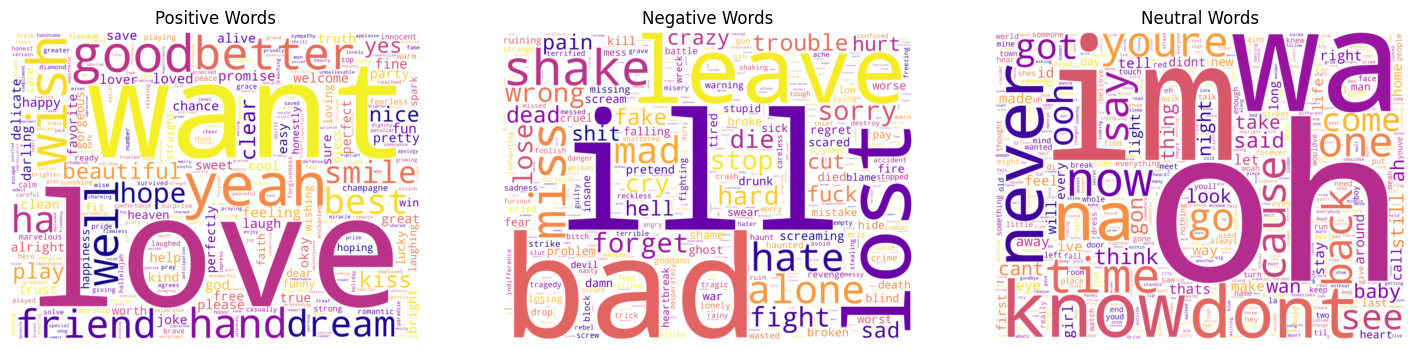

In [11]:
# generate wordclouds for each sentiment type
wordclouds = {}

for sentiment_type in ['Positive', 'Negative', 'Neutral']:
    words = [word[1] for word in word_sentiments if word[0] == sentiment_type]
    if words:
        wordcloud = WordCloud(relative_scaling=0.3,
                              min_font_size=1,
                              background_color='white',
                              width=1024,
                              height=768,
                              max_words=500,
                              colormap='plasma',
                              scale=3,
                              font_step=4,
                              collocations=False,
                              margin=5).generate(' '.join(words))
        wordclouds[sentiment_type] = wordcloud

# display wordclouds
plt.figure(figsize=(18, 6))
for i, sentiment_type in enumerate(['Positive', 'Negative', 'Neutral']):
    if sentiment_type in wordclouds:
        plt.subplot(1, 3, i+1)
        plt.imshow(wordclouds[sentiment_type], interpolation='bilinear')
        plt.title(sentiment_type + ' Words')
        plt.axis('off')
plt.show()

# note: does not show 'like'

## NRCLex

In [12]:
# emotion classification
lyric_emot = NRCLex(lyric_words)
lyric_emot.affect_frequencies

{'fear': 0.09547491039426523,
 'anger': 0.06984767025089605,
 'anticip': 0.0,
 'trust': 0.08906810035842294,
 'surprise': 0.053315412186379925,
 'positive': 0.16671146953405017,
 'negative': 0.15492831541218638,
 'sadness': 0.0989695340501792,
 'disgust': 0.05524193548387097,
 'joy': 0.11482974910394265,
 'anticipation': 0.10161290322580645}

In [13]:
# most common emotion
lyric_emot.top_emotions

[('positive', 0.16671146953405017)]

In [14]:
# total no. of words
tot_words = len(lyric_emot.words)
print('Total words in the text:', tot_words)

Total words in the text: 85324


In [15]:
# create dataframe
sentiment_scores = pd.DataFrame(list(lyric_emot.raw_emotion_scores.items()))
sentiment_scores = sentiment_scores.rename(columns={0: 'Sentiment', 1: 'Count'})
sentiment_scores

Sentiment  Count
0          fear   2131
1      negative   3458
2       sadness   2209
3      surprise   1190
4  anticipation   2268
5           joy   2563
6      positive   3721
7         trust   1988
8         anger   1559
9       disgust   1233

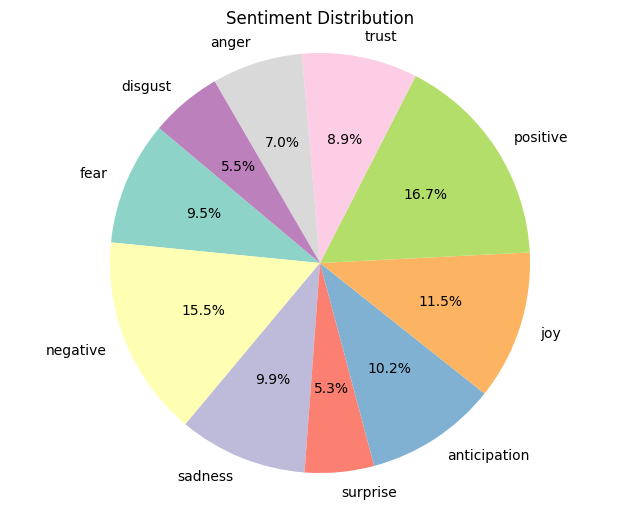

In [16]:
# pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_scores['Count'],
        labels=sentiment_scores['Sentiment'],
        colors=plt.cm.Set3.colors,
        autopct='%1.1f%%',
        startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [17]:
# define colormaps for each sentiment
sentiment_cmaps = {
    'fear': 'twilight',
    'anger': 'jet',
    'anticipation': 'twilight',
    'trust': 'ocean',
    'surprise': 'gnuplot2',
    'positive': 'hsv',
    'negative': 'spring',
    'sadness': 'PiYG',
    'disgust': 'gist_heat',
    'joy': 'gist_ncar'
    }

# all unique sentiments in the text
unique_sentiments = list(set(sentiment for emotions
                            in lyric_emot.affect_dict.values()
                            for sentiment in emotions))

C:\Users\jessi\AppData\Local\Temp\ipykernel_9516\1757105548.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(word_counts.index)
C:\Users\jessi\AppData\Local\Temp\ipykernel_9516\1757105548.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(word_counts.index)
C:\Users\jessi\AppData\Local\Temp\ipykernel_9516\1757105548.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(word_counts.index)
C:\Users\jessi\AppData\Local\Temp\ipykernel_9516\1757105548.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_yticklabels(word_counts.index)
C:\Users\jessi\AppData\Local\Temp\ipykernel_

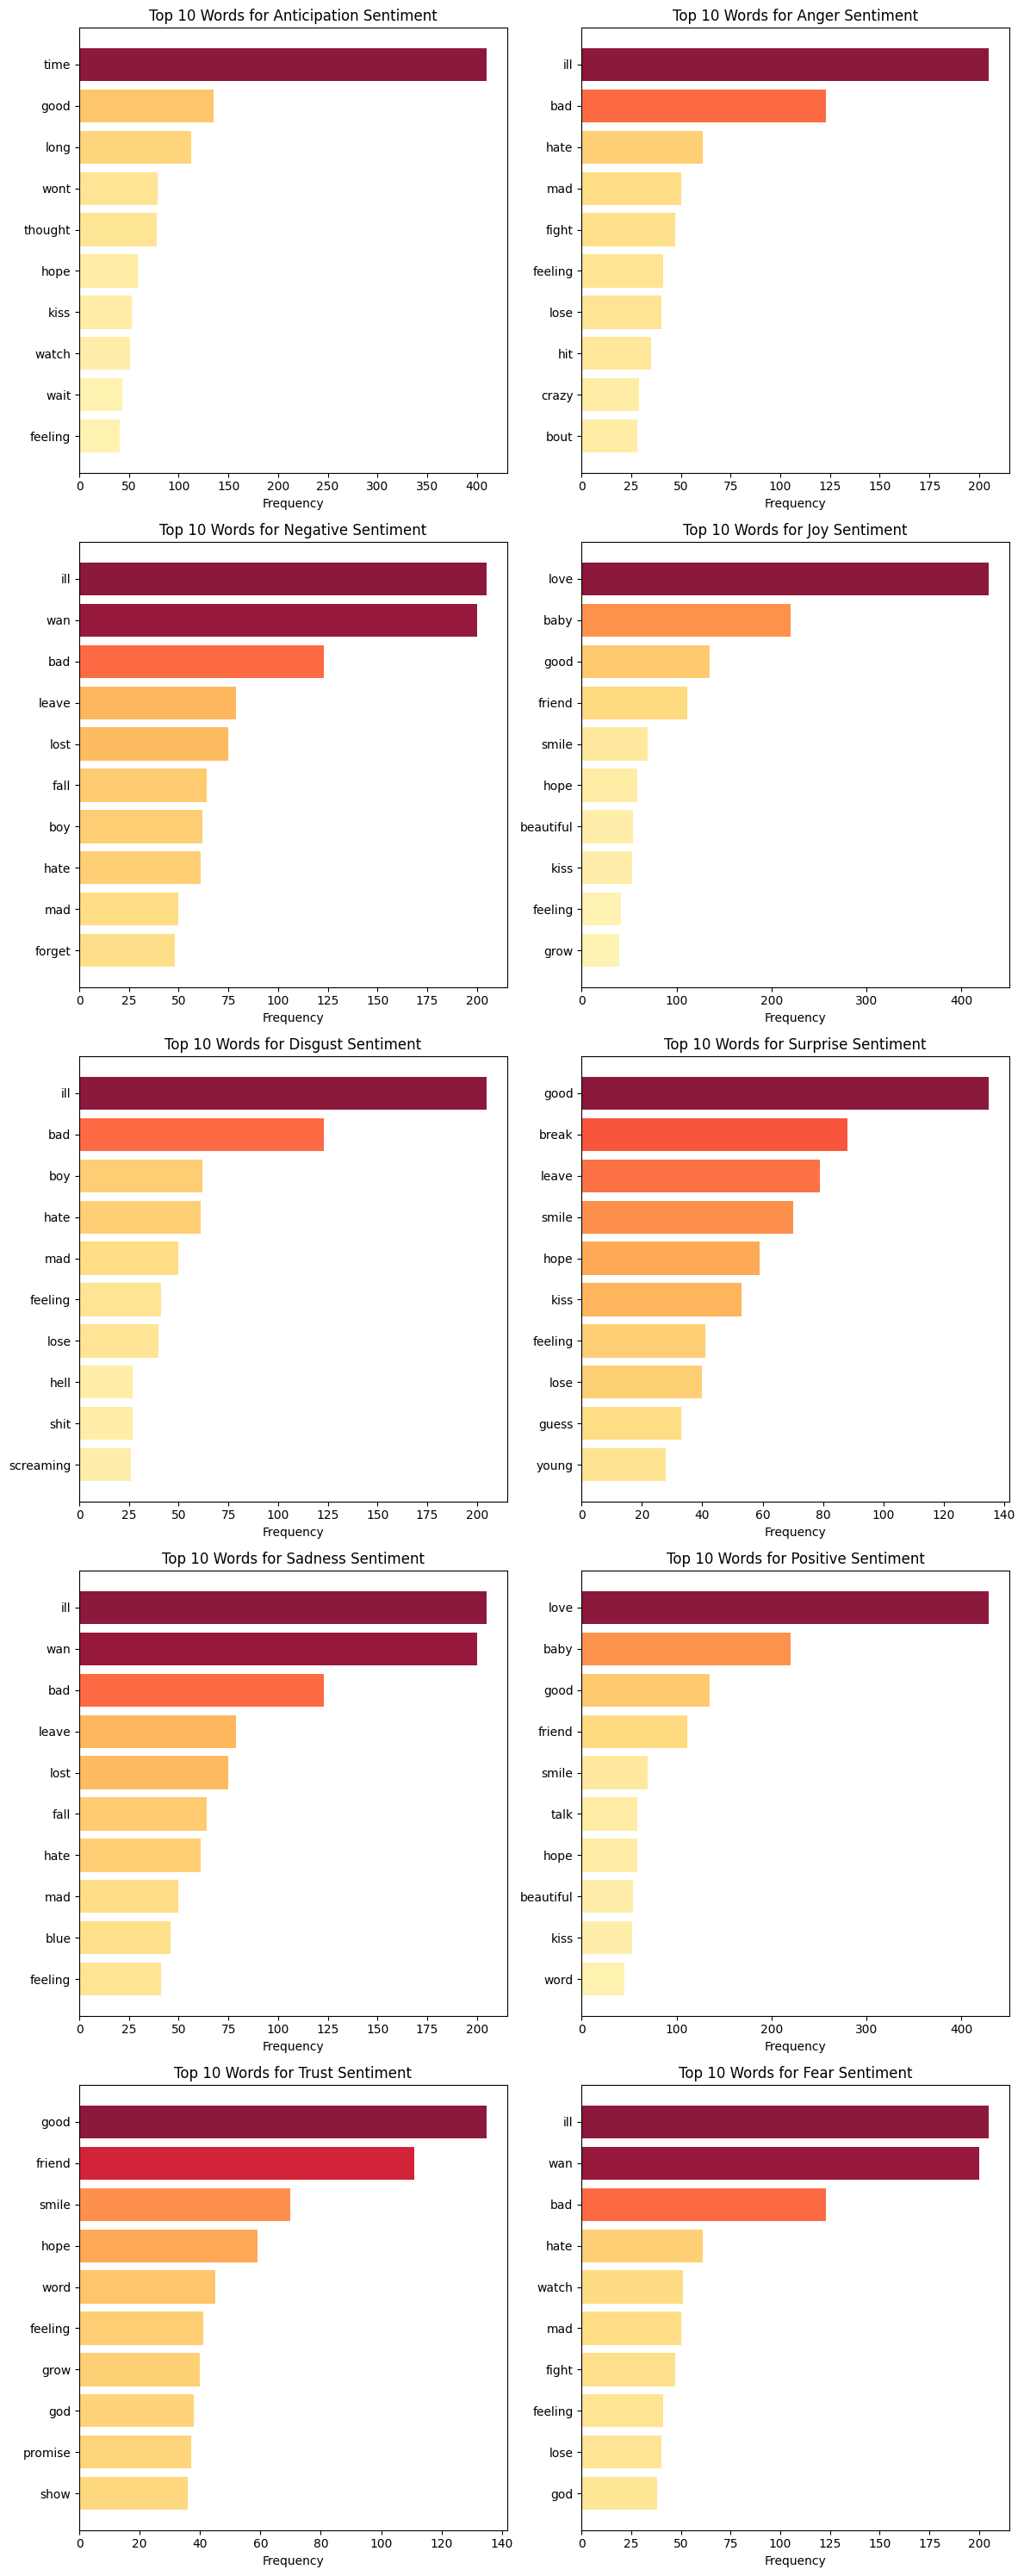

In [19]:
# create pandas Series from the list of filtered tokens
word_series = pd.Series(lem_lyrics)

# create dictionary to store word frequencies for each sentiment
sentiment_word_counts = {}

# calculate word frequencies for each sentiment
for sentiment in unique_sentiments:
    words_for_sentiment = [word for word, emotions in lyric_emot.affect_dict.items() if sentiment in emotions]
    sentiment_word_counts[sentiment] = word_series[word_series.isin(words_for_sentiment)].value_counts().head(10)

# plot bar graph for each sentiment
num_rows = len(unique_sentiments) // 2 + (1 if len(unique_sentiments) % 2 != 0 else 0)
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 6))
axs = axs.ravel()

for i, sentiment in enumerate(unique_sentiments):
    word_counts = sentiment_word_counts[sentiment]
    axs[i].barh(word_counts.index, word_counts.values, color=plt.cm.YlOrRd(word_counts.values / max(word_counts.values)), alpha=0.9)
    axs[i].set_title(f'Top 10 Words for {sentiment.capitalize()} Sentiment')
    axs[i].set_xlabel('Frequency')
    axs[i].tick_params(axis='y')
    axs[i].set_yticklabels(word_counts.index)
    axs[i].invert_yaxis()

# hide remaining empty subplots
for j in range(len(unique_sentiments), num_rows * num_cols):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

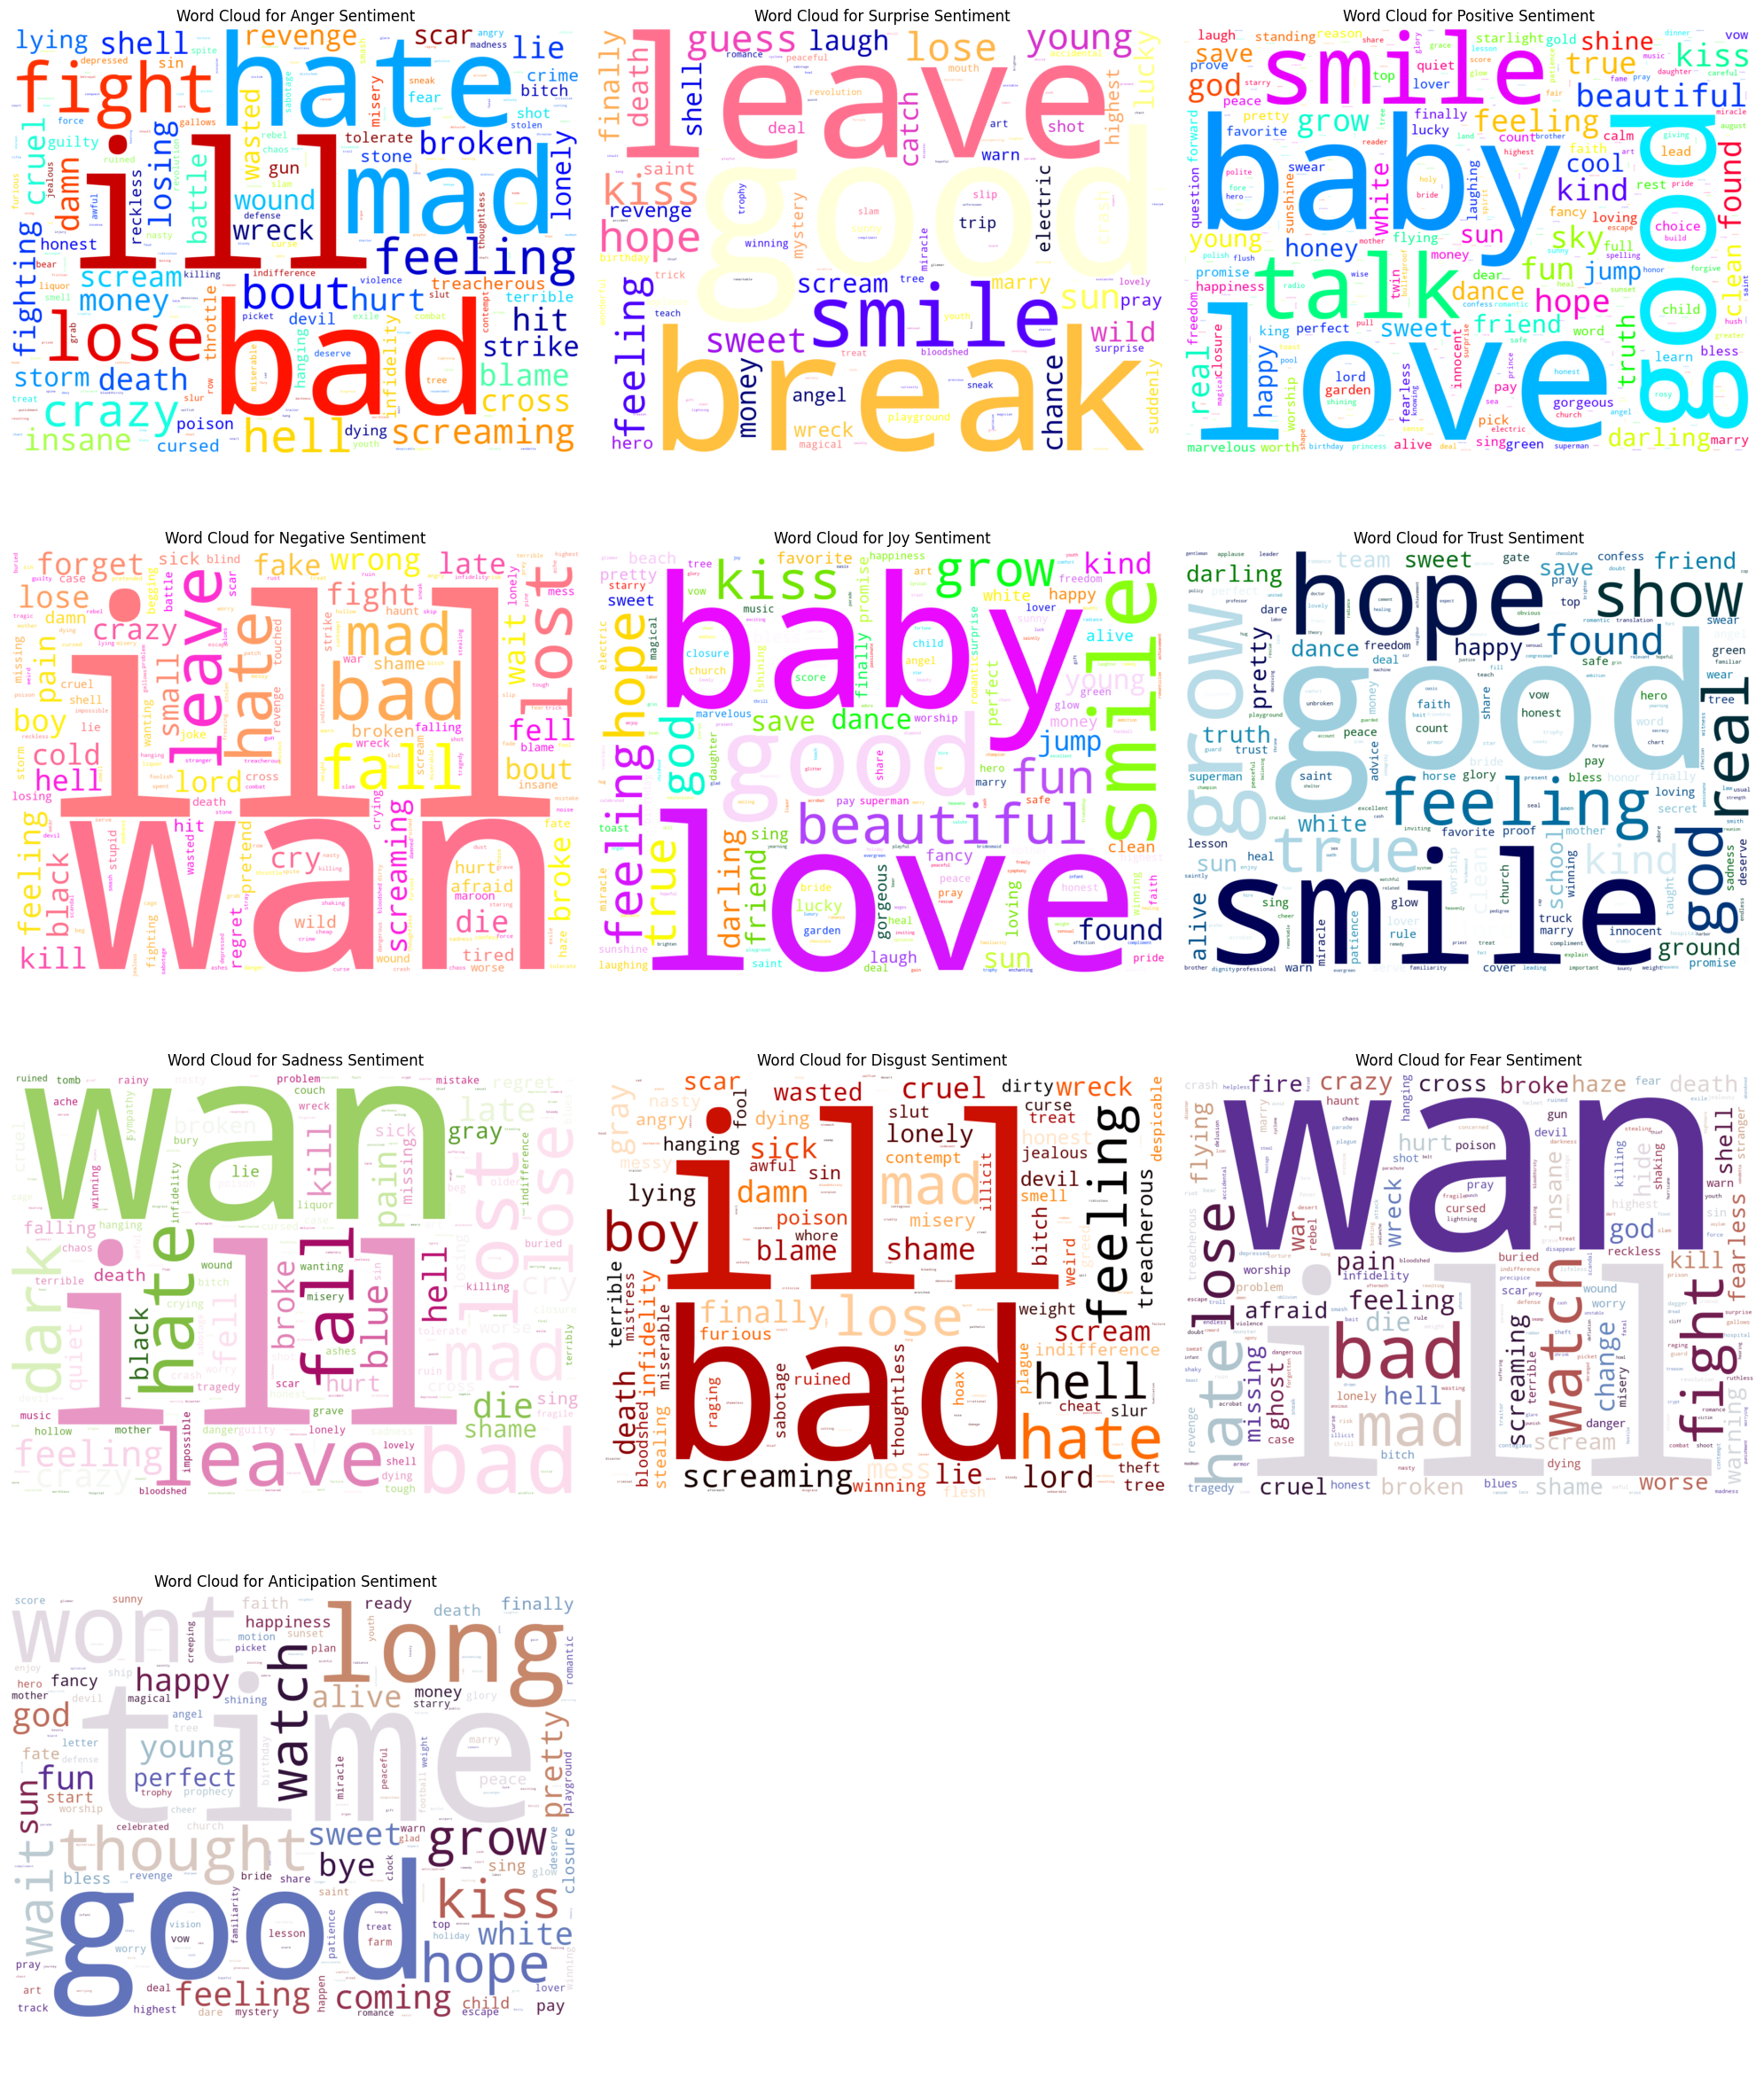

In [ ]:
# determine no. of rows and columns needed
num_rows = len(unique_sentiments) // 3 + (1 if len(unique_sentiments) % 3 != 0 else 0)
num_cols = 3

# create subplots with 3 columns
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6))

# flatten the axis array
axs = np.ravel(axs)

# calculate word frequencies for each sentiment
for sentiment in unique_sentiments:
    words_for_sentiment = [word for word, emotions in lyric_emot.affect_dict.items() if sentiment in emotions]
    sentiment_word_counts[sentiment] = word_series[word_series.isin(words_for_sentiment)].value_counts()

    
# create wordcloud for each sentiment
for i, sentiment in enumerate(unique_sentiments):
    words_for_sentiment = [word for word, emotions in lyric_emot.affect_dict.items() if sentiment in emotions]
    word_counts = sentiment_word_counts[sentiment]

    # create wordcloud
    wordcloud = WordCloud(
        relative_scaling=0.3,
        min_font_size=1,
        background_color='white',
        width=400,
        height=300,
        max_words=500,
        colormap=sentiment_cmaps.get(sentiment),
        scale=3,
        font_step=4,
        collocations=False,
        margin=5
        )

    # generate wordcloud
    wordcloud.generate_from_frequencies(word_counts.to_dict())

    # display wordcloud in the respective subplot
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Word Cloud for {sentiment.capitalize()} Sentiment')
    axs[i].axis('off')

# hide remaining empty subplots
for j in range(len(unique_sentiments), num_rows * num_cols):
    axs[j].axis('off')

# adjust layout
plt.tight_layout()
plt.show()